In [63]:
from pygmo import hypervolume
import pygmo as pg
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
'hypervolume' in dir()

True

In [9]:
udp = pg.problem(pg.dtlz(prob_id = 2, dim = 10, fdim = 2))

In [10]:
pop = pg.population(udp, 50)

In [11]:
hv = hypervolume(pop)
hv

In [39]:
ref_point = [2,2,2,2,2]
hv = hypervolume([[1, 0, 0, 0, 1], [0, 1, 0, 0, 2],[0, 0, 1, 0, 0]] )
hv.compute(ref_point)

20.0

120.0

In [49]:
def read_solutions(file):

    points = []
    with open(file) as file:
        for line in file:
            point = []
            splitted_line = line.replace('\n','').split(',')
            try:
                x = float(splitted_line[0])
                y = float(splitted_line[1])
            except:
                pass

            point.append(x)
            point.append(y)
            points.append(point)
            
    return points

In [75]:
evaluations = 200000
executions = 15
step = 5000
problem = 'DTLZ1_2'
ref_point = [51,51]
path = '/home/renansantos/NetBeansProjects/PhD_MOEAD/Results/'
file_path = path + 'DTLZ1-2' + '/'

df = pd.DataFrame(data=None)

for i in range(executions):
    print('execution ',i)
    exec_hv = []
    for j in np.arange(step,evaluations,step):
        name = problem + '-' + str(i) + '-' + str(j) + '-solutions.csv'
        hv = hypervolume(read_solutions(file_path + name))
        exec_hv.append(hv.compute(ref_point))
    df[i] = exec_hv

execution  0
execution  1
execution  2
execution  3
execution  4
execution  5
execution  6
execution  7
execution  8
execution  9
execution  10
execution  11
execution  12
execution  13
execution  14


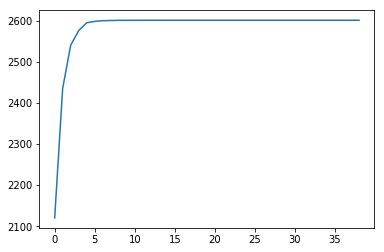

In [76]:
df.mean(axis=1).plot()